<a href="https://colab.research.google.com/github/scrunts23/Unit-1-build-/blob/master/Unit_1_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# imports 

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_1samp

In [5]:
# get data from website 

! wget http://openpsychometrics.org/_rawdata/NPI.zip

--2020-02-09 19:54:01--  http://openpsychometrics.org/_rawdata/NPI.zip
Resolving openpsychometrics.org (openpsychometrics.org)... 69.164.197.103
Connecting to openpsychometrics.org (openpsychometrics.org)|69.164.197.103|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://openpsychometrics.org/_rawdata/NPI.zip [following]
--2020-02-09 19:54:01--  https://openpsychometrics.org/_rawdata/NPI.zip
Connecting to openpsychometrics.org (openpsychometrics.org)|69.164.197.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172755 (169K) [application/zip]
Saving to: ‘NPI.zip.1’

NPI.zip.1           100%[===================>] 168.71K  --.-KB/s    in 0.1s    

2020-02-09 19:54:02 (1.38 MB/s) - ‘NPI.zip.1’ saved [172755/172755]



In [6]:
# unzip data 

! unzip NPI.zip

Archive:  NPI.zip
replace NPI/codebook.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace NPI/data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: NPI/data.csv            


In [7]:
# read in data 

npi_data = pd.read_csv('NPI/data.csv')
npi_data.sample(15)

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
5491,10,1,2,2,1,1,2,1,1,2,2,1,2,2,2,1,2,2,1,2,1,2,1,1,2,2,1,2,1,2,2,2,1,1,1,1,2,2,2,2,2,288,1,35
9625,11,2,2,2,2,2,2,1,2,2,1,2,2,1,2,1,2,2,1,1,1,1,2,1,2,2,2,2,1,2,2,1,1,2,2,2,2,2,2,2,2,166,1,16
1949,15,1,2,2,1,2,1,1,2,1,2,2,1,1,2,1,1,2,2,1,1,1,2,2,2,2,2,2,1,1,2,2,1,2,2,1,2,1,2,2,1,365,1,27
8623,12,2,2,2,1,1,2,1,2,1,2,1,1,2,2,1,1,2,1,1,1,1,1,1,2,2,1,2,1,2,1,1,2,1,1,1,2,2,2,1,1,302,2,53
1281,28,1,1,2,2,2,1,2,1,2,2,1,1,2,2,1,1,2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,2,1,2,2,1,2,2,1,2,583,2,39
10892,15,1,2,2,2,2,1,1,2,1,2,1,2,2,2,1,1,1,1,2,1,2,2,1,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,1,1,283,1,23
9998,17,2,1,1,1,1,2,1,1,2,1,2,1,1,1,1,1,1,2,1,2,0,1,1,1,1,2,2,0,1,2,2,1,2,2,1,2,1,1,2,2,342,2,23
8781,22,1,1,1,1,2,1,2,1,2,1,2,1,1,2,1,2,1,1,1,1,1,2,2,1,2,2,2,1,1,1,1,1,2,2,2,2,2,1,1,2,187,1,18
7589,9,1,2,2,1,1,1,2,2,1,1,2,2,2,2,1,1,1,1,1,2,2,2,1,2,2,1,2,1,2,1,2,1,2,1,1,2,2,2,2,2,268,2,30
2586,30,1,1,2,2,2,1,2,1,2,2,1,1,1,2,1,1,1,2,2,2,2,2,1,1,1,2,1,1,1,1,1,1,1,2,2,1,2,1,1,2,287,2,21


In [8]:
# describe data 

npi_data.describe()

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
count,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,1.124300e+04,11243.000000,11243.000000
mean,13.299653,1.385751,1.784844,1.827804,1.174242,1.422307,1.628391,1.302944,1.412612,1.456106,1.509739,1.548430,1.560349,1.666281,1.737615,1.215512,1.548964,1.262830,1.329627,1.282487,1.260340,1.773726,1.380681,1.155030,1.686561,1.770168,1.515699,1.735480,1.194699,1.560438,1.673397,1.581340,1.296896,1.544517,1.667882,1.257582,1.807614,1.688695,1.845860,1.606955,1.414925,1.195542e+05,1.429956,34.014231
std,8.508833,0.489890,0.415898,0.382250,0.386075,0.498074,0.486375,0.463982,0.496285,0.505537,0.507521,0.501942,0.505600,0.480531,0.447766,0.418060,0.501359,0.449588,0.476862,0.457092,0.446077,0.425813,0.491946,0.368525,0.472273,0.428909,0.503853,0.447504,0.405092,0.503650,0.480607,0.500344,0.466162,0.505482,0.477931,0.449954,0.400239,0.471613,0.370342,0.495859,0.498831,1.262668e+07,0.504348,15.015611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+00,0.000000,0.000000
25%,7.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.040000e+02,1.000000,23.000000
50%,12.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.570000e+02,1.000000,30.000000
75%,18.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.410000e+02,2.000000,43.000000
max,40.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.338845e+09,3.000000,509.000000


In [9]:
# look at gender value counts 

npi_data['gender'].value_counts()

1    6425
2    4766
3      40
0      12
Name: gender, dtype: int64

In [10]:
# look at gender value counts 

npi_data['age'].value_counts()

22     459
20     452
21     451
19     423
23     414
      ... 
509      1
6        1
190      1
366      1
100      1
Name: age, Length: 83, dtype: int64

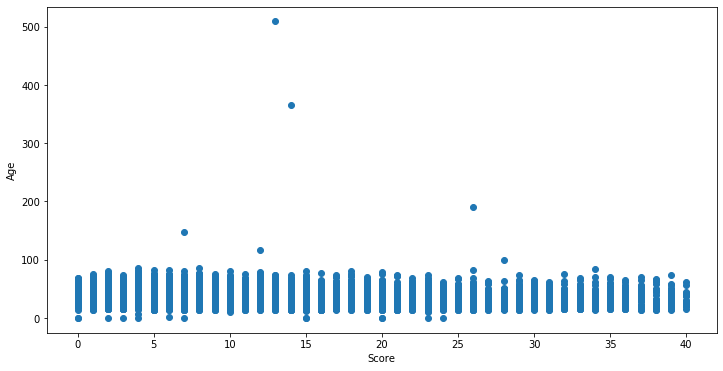

In [11]:
# looking at graph to see outliers 

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(npi_data['score'], npi_data['age'])
ax.set_xlabel('Score')
ax.set_ylabel('Age')
plt.show();

In [12]:
# cleaning data with age outliers

index = npi_data[(npi_data['age'] >= 100)|(npi_data['age'] <= 15)].index
npi_data.drop(index, inplace=True)
npi_data['age'].describe()

count    11021.000000
mean        34.305780
std         13.657376
min         16.000000
25%         23.000000
50%         31.000000
75%         44.000000
max         86.000000
Name: age, dtype: float64

In [13]:
# cleaning data with gender 

index2 = npi_data[(npi_data['gender'] == 0)].index
npi_data.drop(index2, inplace=True)
npi_data['gender'].describe()

count    11009.000000
mean         1.429921
std          0.501287
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: gender, dtype: float64

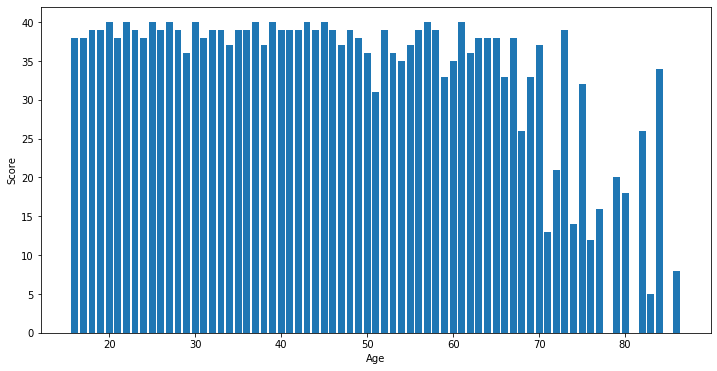

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(npi_data['age'], npi_data['score'])
ax.set_xlabel('Age')
ax.set_ylabel('Score')
plt.show();

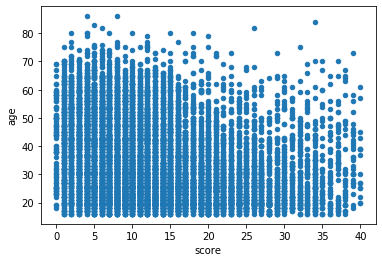

In [15]:
# scatterplot of age and score (playing with data and visulation)

npi_data.plot.scatter('score', 'age');

In [16]:
# create crosstab to see graph of distribution of data 

pd.crosstab(npi_data['score'], npi_data['gender'])

gender,1,2,3
score,,,
0,46,35,0
1,125,119,1
2,142,152,0
3,188,206,0
4,242,253,2
5,270,257,1
6,294,303,1
7,290,258,1
8,315,296,2


In [0]:
# crosstab visualization

myresults = pd.crosstab(npi_data['score'], npi_data['gender'])

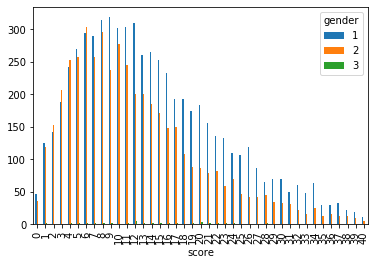

In [18]:
# see distrubtion of data 

myresults.plot(kind='bar');

In [0]:
# using pdcut to add column of generation data from age column

npi_data['generation_by_age'] = pd.cut(x=npi_data['age'], bins=[0, 25, 40, 55, 74, 95], labels=['Gen Z', 'Millennials', 'Gen X', 'Baby Boomer Generation', 'The Silent Generation'])

In [20]:
# look at data 

npi_data.head()

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age,generation_by_age
0,18,2,2,2,2,1,2,1,2,2,2,1,1,2,1,1,1,2,1,1,1,1,1,1,2,2,2,1,2,2,2,1,2,1,1,1,2,2,2,1,2,211,1,50,Gen X
1,6,2,2,2,1,2,2,1,2,1,1,2,2,2,1,2,2,1,1,2,1,2,2,1,2,2,2,2,1,2,2,2,1,2,2,1,2,2,2,2,1,149,1,40,Millennials
2,27,1,2,2,1,2,1,2,1,2,2,2,1,1,1,1,1,2,2,1,1,2,2,2,2,1,2,1,1,2,1,2,2,1,1,2,1,1,2,1,2,168,1,28,Millennials
3,29,1,1,2,2,2,1,2,1,1,2,1,1,1,1,1,1,2,2,1,2,1,1,1,2,1,2,1,2,2,1,1,2,1,1,2,1,2,2,1,1,230,1,37,Millennials
4,6,1,2,1,1,1,2,1,2,1,2,2,2,2,2,1,1,1,1,1,1,1,2,1,2,2,1,2,1,2,2,2,1,2,2,1,2,2,2,0,1,389,1,50,Gen X


In [21]:
# look at value counts for generation by age column 

npi_data['generation_by_age'].value_counts()

Millennials               3897
Gen Z                     3758
Gen X                     2301
Baby Boomer Generation    1017
The Silent Generation       36
Name: generation_by_age, dtype: int64

In [22]:
# create male dataframe of data

male = npi_data[npi_data['gender']==1]
male.head()

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age,generation_by_age
0,18,2,2,2,2,1,2,1,2,2,2,1,1,2,1,1,1,2,1,1,1,1,1,1,2,2,2,1,2,2,2,1,2,1,1,1,2,2,2,1,2,211,1,50,Gen X
1,6,2,2,2,1,2,2,1,2,1,1,2,2,2,1,2,2,1,1,2,1,2,2,1,2,2,2,2,1,2,2,2,1,2,2,1,2,2,2,2,1,149,1,40,Millennials
2,27,1,2,2,1,2,1,2,1,2,2,2,1,1,1,1,1,2,2,1,1,2,2,2,2,1,2,1,1,2,1,2,2,1,1,2,1,1,2,1,2,168,1,28,Millennials
3,29,1,1,2,2,2,1,2,1,1,2,1,1,1,1,1,1,2,2,1,2,1,1,1,2,1,2,1,2,2,1,1,2,1,1,2,1,2,2,1,1,230,1,37,Millennials
4,6,1,2,1,1,1,2,1,2,1,2,2,2,2,2,1,1,1,1,1,1,1,2,1,2,2,1,2,1,2,2,2,1,2,2,1,2,2,2,0,1,389,1,50,Gen X


In [62]:
male.describe()

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
count,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6.310000e+03,6310.0,6310.000000
mean,14.139303,1.374326,1.758954,1.822504,1.198732,1.496513,1.593185,1.303645,1.395246,1.504437,1.535658,1.550713,1.524723,1.622821,1.721553,1.205705,1.543582,1.278447,1.375594,1.285103,1.300317,1.746593,1.377021,1.175119,1.668463,1.748970,1.512520,1.698732,1.168621,1.568304,1.652298,1.555943,1.327892,1.496355,1.660539,1.287797,1.800792,1.664501,1.865293,1.548336,1.461014,2.126607e+05,1.0,33.519493
std,8.707178,0.485948,0.432542,0.385833,0.403423,0.503502,0.494174,0.464327,0.491206,0.506633,0.505396,0.501902,0.507925,0.490246,0.454590,0.409701,0.500676,0.457717,0.491462,0.458467,0.464273,0.440788,0.490207,0.385070,0.479146,0.438728,0.503044,0.464681,0.382405,0.501078,0.486160,0.501978,0.476520,0.506013,0.478227,0.461097,0.404562,0.479860,0.351051,0.504341,0.503264,1.685449e+07,0.0,13.293826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+00,1.0,16.000000
25%,7.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.050000e+02,1.0,23.000000
50%,13.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.570000e+02,1.0,30.000000
75%,20.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.390000e+02,1.0,42.000000
max,40.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.338845e+09,1.0,86.000000


In [23]:
# create female gender dataframe of data 

female = npi_data[npi_data['gender']==2]
female.head()

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age,generation_by_age
7,7,2,2,2,1,2,2,2,2,1,1,2,2,2,2,1,1,1,1,1,1,2,1,1,2,2,1,2,2,2,1,2,1,2,1,1,2,2,2,1,1,367,2,36,Millennials
8,20,1,2,2,1,1,2,2,1,1,1,1,1,1,2,2,1,1,2,2,1,1,2,1,2,1,2,2,2,1,1,1,1,2,1,1,2,1,2,2,1,263,2,24,Gen Z
9,23,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,2,1,2,2,1,1,2,2,1,1,1,1,1,1,1,1,1,2,1,1,2,1,224,2,20,Gen Z
12,30,1,1,1,2,1,2,2,1,2,1,1,1,1,1,2,2,1,2,2,2,1,2,1,1,1,2,1,1,1,1,1,2,2,1,1,2,1,1,1,2,262,2,18,Gen Z
14,13,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,2,1,1,2,2,2,2,1,2,1,2,1,2,1,1,2,1,2,2,2,246,2,31,Millennials


In [63]:
female.describe()

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
count,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.0,4665.000000
mean,11.982422,1.402144,1.825723,1.840086,1.135906,1.315541,1.685959,1.298392,1.441586,1.390139,1.472883,1.546624,1.617792,1.738049,1.765059,1.228939,1.558199,1.240300,1.259593,1.276313,1.201715,1.811790,1.383494,1.126688,1.716184,1.807288,1.517685,1.792926,1.228510,1.553912,1.709325,1.625938,1.252304,1.614362,1.682529,1.209432,1.822294,1.726259,1.823365,1.687031,1.347267,466.222294,2.0,35.406217
std,7.995101,0.495169,0.384440,0.372944,0.353200,0.470284,0.467863,0.462263,0.503064,0.496978,0.507833,0.501736,0.496455,0.453662,0.433509,0.428281,0.502235,0.436741,0.444770,0.454356,0.410827,0.400673,0.493728,0.341563,0.459376,0.405196,0.505287,0.413112,0.431005,0.506538,0.468072,0.493583,0.447031,0.495961,0.475115,0.425492,0.390079,0.456381,0.389741,0.472908,0.484190,2498.517706,0.0,14.079680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,2.0,16.000000
25%,6.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,205.000000,2.0,23.000000
50%,10.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,259.000000,2.0,32.000000
75%,16.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,346.000000,2.0,45.000000
max,40.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,77935.000000,2.0,83.000000


In [24]:
# create other gender dataframe of data 

other = npi_data[npi_data['gender']==3]
other.head()

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age,generation_by_age
48,20,1,2,2,0,1,2,1,1,2,2,1,2,1,2,2,1,2,1,2,1,2,2,1,1,2,2,2,2,1,1,1,1,1,1,1,2,2,2,2,2,1455,3,27,Millennials
130,28,2,1,1,2,2,2,2,1,2,1,2,1,2,1,1,2,2,2,1,2,2,2,2,1,1,2,1,2,2,1,1,2,1,1,2,1,2,2,1,2,108,3,23,Gen Z
131,8,1,2,2,1,1,1,1,2,1,2,1,1,1,2,1,2,1,1,1,1,2,2,1,2,2,1,2,1,2,2,2,1,1,2,1,2,2,2,2,1,138,3,27,Millennials
200,15,1,2,1,1,1,2,2,1,1,1,2,1,2,2,1,1,1,1,1,2,2,1,1,2,2,2,2,2,2,1,1,1,1,1,1,2,1,2,2,2,438,3,35,Millennials
474,16,1,2,2,1,2,1,1,1,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2,2,2,1,2,1,2,1,2,2,2,2,2,2,1,2,1,2,191,3,34,Millennials


In [64]:
other.describe()

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0,34.000000
mean,14.147059,1.441176,1.794118,1.852941,1.176471,1.500000,1.558824,1.382353,1.382353,1.500000,1.500000,1.617647,1.470588,1.647059,1.735294,1.235294,1.705882,1.117647,1.352941,1.441176,1.382353,1.794118,1.500000,1.117647,1.588235,1.647059,1.441176,1.676471,1.147059,1.529412,1.588235,1.529412,1.264706,1.705882,1.647059,1.294118,1.735294,1.617647,1.911765,1.588235,1.617647,333.911765,3.0,31.794118
std,6.924407,0.503995,0.410426,0.359491,0.458627,0.507519,0.503995,0.493270,0.493270,0.507519,0.507519,0.493270,0.506640,0.485071,0.447811,0.430562,0.462497,0.327035,0.543967,0.503995,0.493270,0.410426,0.507519,0.327035,0.499554,0.597081,0.503995,0.474858,0.359491,0.506640,0.499554,0.506640,0.447811,0.462497,0.485071,0.462497,0.447811,0.493270,0.287902,0.499554,0.493270,287.740452,0.0,12.037264
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,108.000000,3.0,17.000000
25%,9.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.250000,1.000000,2.000000,1.000000,1.000000,200.750000,3.0,22.000000
50%,13.500000,1.000000,2.000000,2.000000,1.000000,1.500000,2.000000,1.000000,1.000000,1.500000,1.500000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.500000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,238.500000,3.0,29.000000
75%,19.750000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,319.250000,3.0,38.750000
max,28.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1455.000000,3.0,64.000000
